In [1]:
import keras
import numpy as np
import os, shutil

Using TensorFlow backend.


In [2]:
from keras.models import load_model
model = load_model('cats_and_dogs.small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
img_path= '/mnt/data/ppaudyal/cats_and_dogs_small/test/cats/1499.jpg'

In [18]:
from keras.preprocessing import image

img = image.load_img(img_path, target_size=(150, 150)) #does this auto upscale?
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) #same as np.reshape with 1 since evaluate will expect num_samples as shape[0]
img_tensor /= 255.


In [19]:
img_tensor.shape

(1, 150, 150, 3)

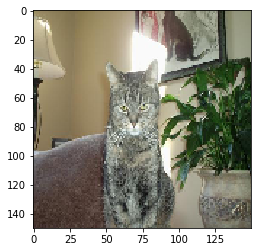

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.imshow(img_tensor[0]) #the first dimension is samples dimension
plt.show()